In [4]:
## 1. Exploratory Data Analysis

In [5]:
# Load library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from datetime import datetime
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as stm
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.mediation import Mediation

# Read the file into the workspace
Apps_clean = pd.read_csv(r'./Datasets/Apps_clean.csv')

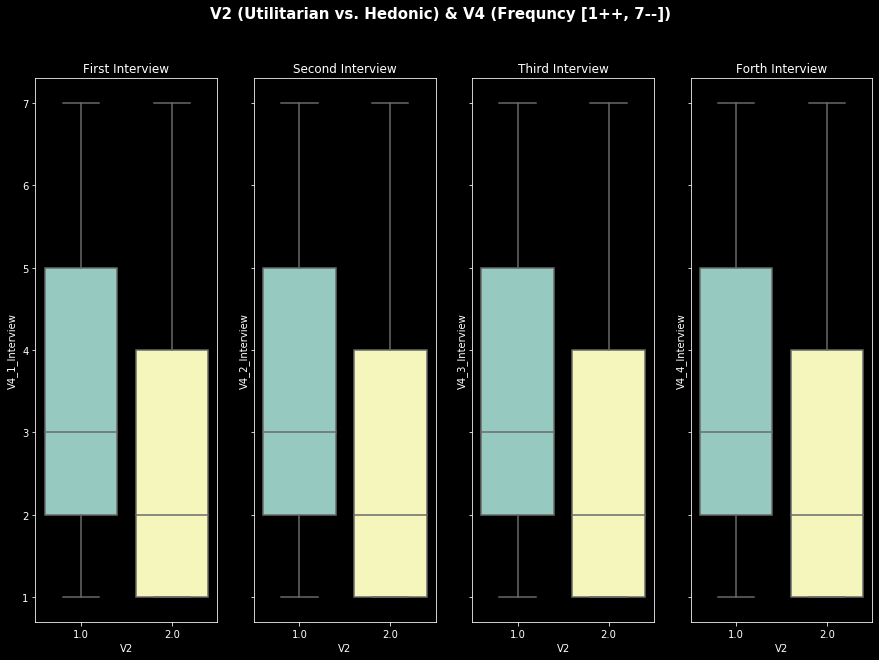

In [6]:
# V2 differences in frequency between utilitarian and hedonic
fig, axs = plt.subplots(nrows=1, ncols=4, sharex=True,
                        sharey=True, figsize=(15, 10))
fig.suptitle('V2 (Utilitarian vs. Hedonic) & V4 (Frequncy [1++, 7--])',
             fontsize=15, fontweight='bold')
sns.boxplot(x='V2', y='V4_1_Interview', data=Apps_clean,
            ax=axs[0])
axs[0].set_title('First Interview')
sns.boxplot(x='V2', y='V4_2_Interview', data=Apps_clean,
            ax=axs[1])
axs[1].set_title('Second Interview')
sns.boxplot(x='V2', y='V4_3_Interview', data=Apps_clean,
            ax=axs[2])
axs[2].set_title('Third Interview')
sns.boxplot(x='V2', y='V4_4_Interview', data=Apps_clean,
            ax=axs[3])
axs[3].set_title('Forth Interview')
fig.subplots_adjust(hspace=0.8)
plt.show()

**COMMENT**: <br />
 - Median across interviews is the same <br />
 - Hedonic apps (2.0) are in average more frequenctly used

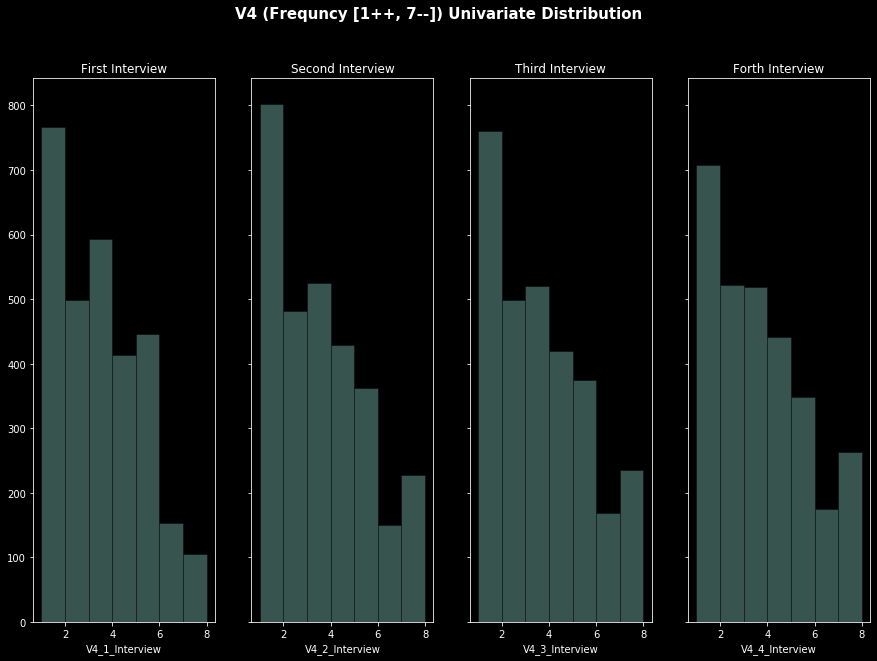

In [7]:
# Dependent variable distribution
fig, axs = plt.subplots(nrows=1, ncols=4, sharex=True,
                        sharey=True, figsize=(15, 10))
fig.suptitle('V4 (Frequncy [1++, 7--]) Univariate Distribution',
             fontsize=15, fontweight='bold')
sns.distplot(Apps_clean['V4_1_Interview'], bins=np.arange(1, 9),
             hist_kws=dict(ec="k"), kde=False, ax=axs[0])
axs[0].set_title('First Interview')
sns.distplot(Apps_clean['V4_2_Interview'], bins=np.arange(1, 9),
             hist_kws=dict(ec="k"), kde=False, ax=axs[1])
axs[1].set_title('Second Interview')
sns.distplot(Apps_clean['V4_3_Interview'], bins=np.arange(1, 9),
             hist_kws=dict(ec="k"), kde=False, ax=axs[2])
axs[2].set_title('Third Interview')
sns.distplot(Apps_clean['V4_4_Interview'], bins=np.arange(1, 9),
             hist_kws=dict(ec="k"), kde=False, ax=axs[3])
axs[3].set_title('Forth Interview')
fig.subplots_adjust(hspace=0.8)
plt.show()

**COMMENT**: <br />
 - The distribution of frequency seems to be the same across interviews

In [8]:
# create a dummy variable
V2_enc = OneHotEncoder(categories='auto', drop='first')
V2_enc = V2_enc.fit(Apps_clean['V2'].values.reshape(-1, 1))
V2_enc.categories_
# 1 if ith apps is hedonic
# 0 if ith apps is utilitarian

X = V2_enc.transform(Apps_clean['V2'].values.reshape(-1, 1)).toarray()

model = stm.OLS(Apps_clean['V4_1_Interview'], stm.add_constant(X)).fit()
print(model.summary())

OLS Regression Results                            
Dep. Variable:         V4_1_Interview   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     174.6
Date:                Mon, 21 Oct 2019   Prob (F-statistic):           8.85e-39
Time:                        12:26:10   Log-Likelihood:                -5755.0
No. Observations:                2977   AIC:                         1.151e+04
Df Residuals:                    2975   BIC:                         1.153e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4372      0.042     81.152      0.000       3.354       3.520
x

**COMMENT:** <br />
 - *b0* interpreted as the average frequency among utilitarian apps. <br />
 - *b0 + b1* average frequency among hendonic apps. <br />
 - P-values are very low. This indicates that there is statistical
 evidence of a difference in average frequency between V2
 (utilitarian vs. hedonic apps), but it does not explain variance, since
 $R^{2}$ is low.

In [9]:
# Check if they change with the time.
# (Does not seems to change looking at the graphs)
# run Linear Regression models:
for i in ['V4_1_Interview', 'V4_2_Interview',
          'V4_3_Interview', 'V4_4_Interview']:
    model = stm.OLS(Apps_clean[i], stm.add_constant(X)).fit()
    print(model.summary())

OLS Regression Results                            
Dep. Variable:         V4_1_Interview   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     174.6
Date:                Mon, 21 Oct 2019   Prob (F-statistic):           8.85e-39
Time:                        12:26:10   Log-Likelihood:                -5755.0
No. Observations:                2977   AIC:                         1.151e+04
Df Residuals:                    2975   BIC:                         1.153e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4372      0.042     81.152      0.000       3.354       3.520
x

**COMMENT:**<br />
 - The coefficients do not significantly change across interviews

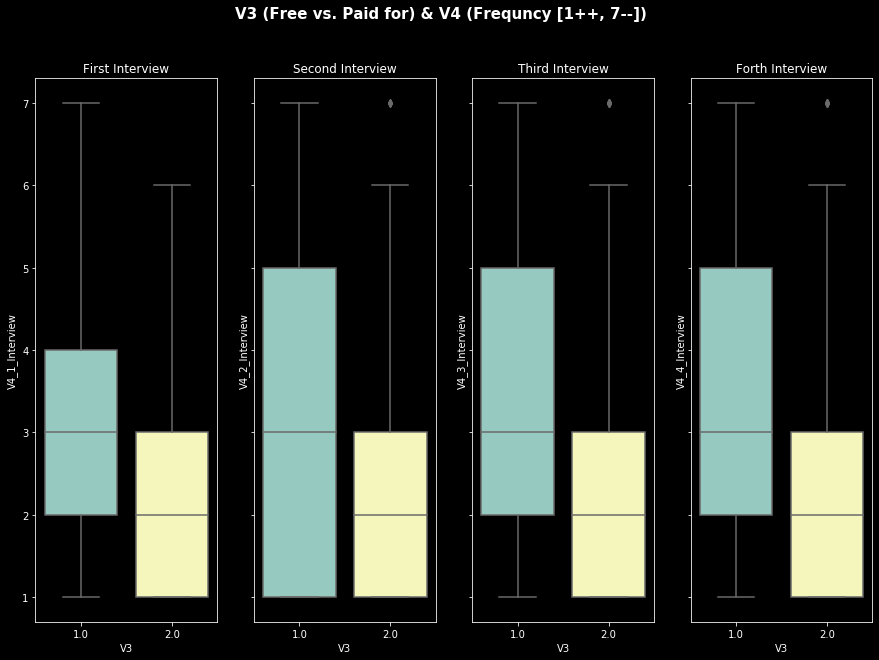

In [10]:
# V3 (free vs paid for)
fig, axs = plt.subplots(nrows=1, ncols=4, sharex=True,
                        sharey=True, figsize=(15, 10))
fig.suptitle('V3 (Free vs. Paid for) & V4 (Frequncy [1++, 7--])',
             fontsize=15, fontweight='bold')
sns.boxplot(x='V3', y='V4_1_Interview', data=Apps_clean,
            ax=axs[0])
axs[0].set_title('First Interview')
sns.boxplot(x='V3', y='V4_2_Interview', data=Apps_clean,
            ax=axs[1])
axs[1].set_title('Second Interview')
sns.boxplot(x='V3', y='V4_3_Interview', data=Apps_clean,
            ax=axs[2])
axs[2].set_title('Third Interview')
sns.boxplot(x='V3', y='V4_4_Interview', data=Apps_clean,
            ax=axs[3])
axs[3].set_title('Forth Interview')
fig.subplots_adjust(hspace=0.8)
plt.show()

**COMMENT:**<br />
 1. Median does not change across interviews
 2. Paid for apps (2.0) are more frequently used

In [11]:
# create a dummy variable
V3_enc = OneHotEncoder(categories='auto', drop='first')
V3_enc = V3_enc.fit(Apps_clean['V3'].values.reshape(-1, 1))
V3_enc.categories_
# 1 if ith apps is paid for
# 0 if ith apps is free

del X
X = V3_enc.transform(Apps_clean['V3'].values.reshape(-1, 1)).toarray()

# create the model using statsmodels.api
for i in ['V4_1_Interview', 'V4_2_Interview',
          'V4_3_Interview', 'V4_4_Interview']:
    model = stm.OLS(Apps_clean[i], stm.add_constant(X)).fit()
    print(model.summary())


OLS Regression Results                            
Dep. Variable:         V4_1_Interview   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     40.68
Date:                Mon, 21 Oct 2019   Prob (F-statistic):           2.07e-10
Time:                        12:26:12   Log-Likelihood:                -5819.7
No. Observations:                2977   AIC:                         1.164e+04
Df Residuals:                    2975   BIC:                         1.166e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0987      0.032     96.199      0.000       3.036       3.162
x

**COMMENT** <br /> 

- b0 interpreted as the average frequency among free apps
- b0 + b1 average frequency among paid for apps
- p-value is small so there is statistical evidence of a difference in average frequency between V3 (free vs paid for apps).
- The relation does not change with time.

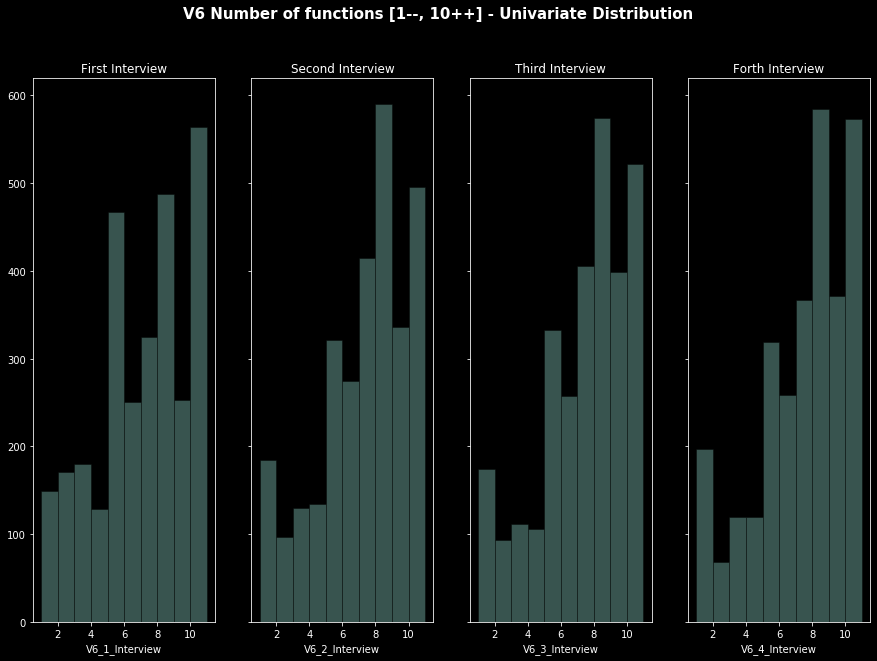

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=4, sharex=True,
                        sharey=True, figsize=(15, 10))
fig.suptitle('V6 Number of functions [1--, 10++] - Univariate Distribution',
             fontsize=15, fontweight='bold')
sns.distplot(Apps_clean['V6_1_Interview'], bins=np.arange(1, 12),
             hist_kws=dict(ec="k"), kde=False, ax=axs[0])
axs[0].set_title('First Interview')
sns.distplot(Apps_clean['V6_2_Interview'], bins=np.arange(1, 12),
             hist_kws=dict(ec="k"), kde=False, ax=axs[1])
axs[1].set_title('Second Interview')
sns.distplot(Apps_clean['V6_3_Interview'], bins=np.arange(1, 12),
             hist_kws=dict(ec="k"), kde=False, ax=axs[2])
axs[2].set_title('Third Interview')
sns.distplot(Apps_clean['V6_4_Interview'], bins=np.arange(1, 12),
             hist_kws=dict(ec="k"), kde=False, ax=axs[3])
axs[3].set_title('Forth Interview')
fig.subplots_adjust(hspace=0.8)
plt.show()


**COMMENT** <br />
 - V6 distribution does not seem to change across interviews

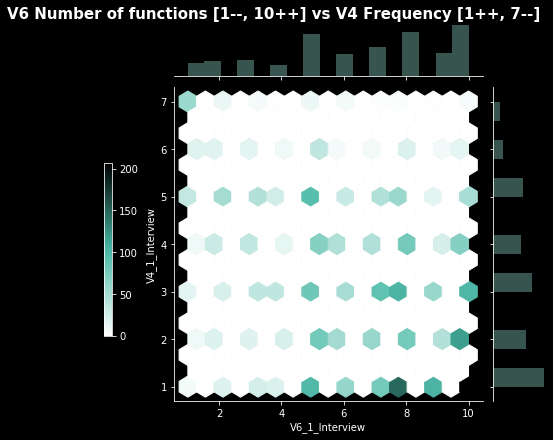

In [13]:
hexplot = sns.jointplot('V6_1_Interview', 'V4_1_Interview', data=Apps_clean,
                        kind='hex')
cbar_ax = hexplot.fig.add_axes([-.05, .25, .02, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)
plt.title('V6 Number of functions [1--, 10++] vs V4 Frequency [1++, 7--] ',
          x=20, y=1.8, fontsize=15, fontweight='bold')
plt.show()

**COMMENT**: <br />
 - Apps with more functions tend to be used more.

In [14]:
# create the model using statsmodels.api
model = stm.OLS(Apps_clean.loc[:, 'V4_1_Interview'],
                stm.add_constant(Apps_clean.loc[:, 'V6_1_Interview'].values.reshape(-1, 1))).fit()
print(model.summary())

OLS Regression Results                            
Dep. Variable:         V4_1_Interview   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     436.7
Date:                Mon, 21 Oct 2019   Prob (F-statistic):           1.32e-90
Time:                        12:26:17   Log-Likelihood:                -5636.0
No. Observations:                2977   AIC:                         1.128e+04
Df Residuals:                    2975   BIC:                         1.129e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5415      0.077     58.856      0.000       4.390       4.693
x

**COMMENT**: <br />
- P-value and R-squarred are low: the regression model has significant variables but explains little of the variability.
- The trend indicates that the predictor vairable still provides information about the response even though data points fall further from the regression line.

### Regression between V4 and V10 (extended functions)

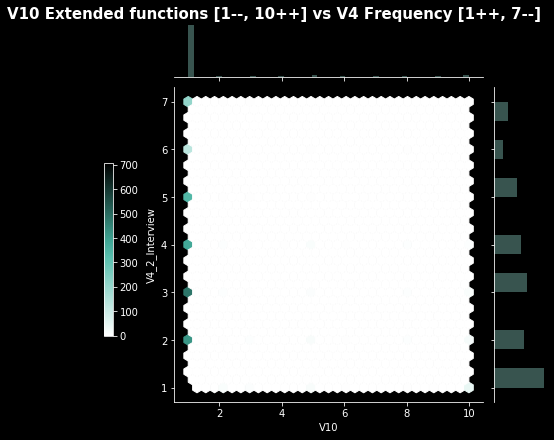

In [15]:
hexplot = sns.jointplot(Apps_clean['V10'], Apps_clean['V4_2_Interview'],
                        kind='hex')
cbar_ax = hexplot.fig.add_axes([-0.05, .25, .02, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)
plt.title('V10 Extended functions [1--, 10++] vs V4 Frequency [1++, 7--] ',
          x=20, y=1.8, fontsize=15, fontweight='bold')
plt.show()

**COMMENT**: <br />
 - V10 cannot explain variability since almost all in 1. <br />
 - feature engineering needed. (e.g. binarize always - not always)

### Linear Regression between V4 and V11 ( cross app use \[1--, 10++\])

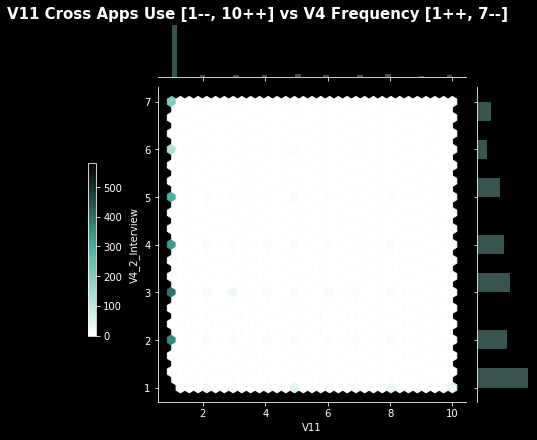

In [16]:
hexplot = sns.jointplot(Apps_clean['V11'], Apps_clean['V4_2_Interview'],
                        kind='hex')
cbar_ax = hexplot.fig.add_axes([-0.05, .25, .02, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)
plt.title('V11 Cross Apps Use [1--, 10++] vs V4 Frequency [1++, 7--] ',
          x=20, y=1.8, fontsize=15, fontweight='bold')
plt.show()

**COMMENT:** <br />
 - V11 cannot explain variability since almost all in 1. <br />
 - feature engineering needed (e.g. binarize in always - not always)

### Linear Regression between V4 and V12 (Satisfaction \[1--, 10++\])

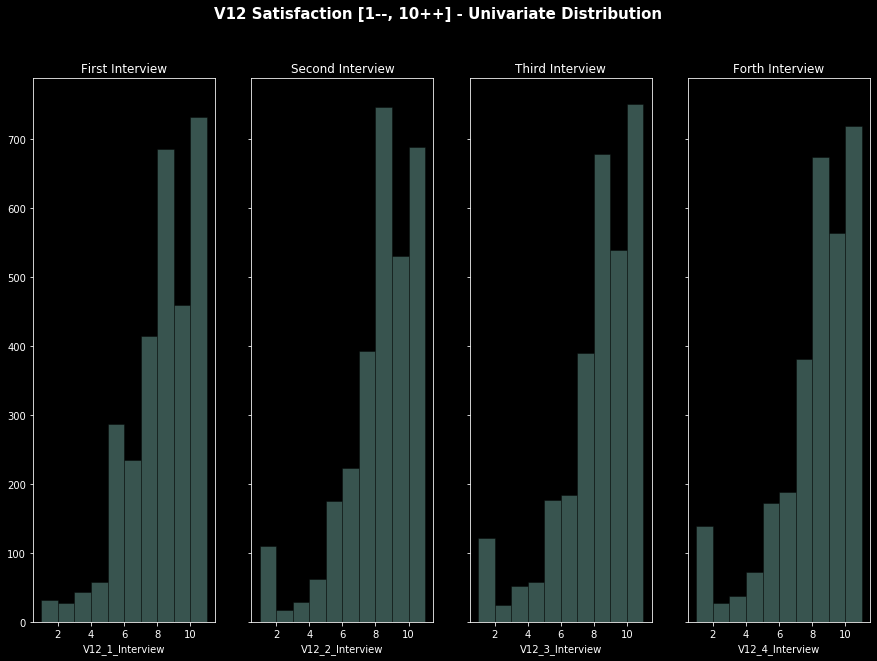

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=4, sharex=True,
                        sharey=True, figsize=(15, 10))
fig.suptitle('V12 Satisfaction [1--, 10++] - Univariate Distribution',
             fontsize=15, fontweight='bold')
sns.distplot(Apps_clean['V12_1_Interview'], bins=np.arange(1, 12),
             hist_kws=dict(ec="k"), kde=False, ax=axs[0])
axs[0].set_title('First Interview')
sns.distplot(Apps_clean['V12_2_Interview'], bins=np.arange(1, 12),
             hist_kws=dict(ec="k"), kde=False, ax=axs[1])
axs[1].set_title('Second Interview')
sns.distplot(Apps_clean['V12_3_Interview'], bins=np.arange(1, 12),
             hist_kws=dict(ec="k"), kde=False, ax=axs[2])
axs[2].set_title('Third Interview')
sns.distplot(Apps_clean['V12_4_Interview'], bins=np.arange(1, 12),
             hist_kws=dict(ec="k"), kde=False, ax=axs[3])
axs[3].set_title('Forth Interview')
fig.subplots_adjust(hspace=0.8)
plt.show()


**COMMENT:** <br />
 - Distribution doesn't change much with the time

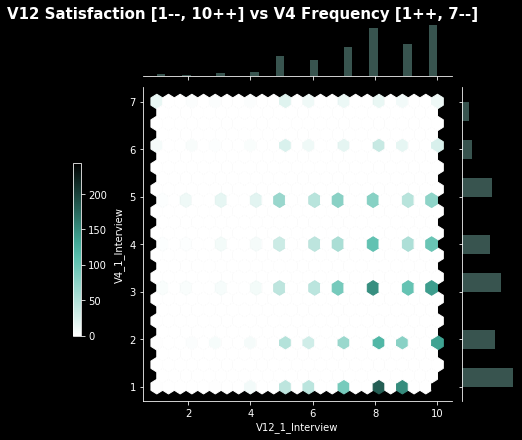

In [18]:
hexplot = sns.jointplot(Apps_clean['V12_1_Interview'],
                        Apps_clean['V4_1_Interview'], kind='hex')
cbar_ax = hexplot.fig.add_axes([-0.05, .25, .02, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)
plt.title('V12 Satisfaction [1--, 10++] vs V4 Frequency [1++, 7--] ',
          x=20, y=1.8, fontsize=15, fontweight='bold')
plt.show()

In [19]:
# create the model using statsmodels.api
model = stm.OLS(Apps_clean.loc[:, 'V4_1_Interview'],
                stm.add_constant(Apps_clean.loc[:, 'V12_1_Interview'].values.reshape(-1, 1))).fit()
print(model.summary())

OLS Regression Results                            
Dep. Variable:         V4_1_Interview   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     236.5
Date:                Mon, 21 Oct 2019   Prob (F-statistic):           2.04e-51
Time:                        12:26:28   Log-Likelihood:                -5726.0
No. Observations:                2977   AIC:                         1.146e+04
Df Residuals:                    2975   BIC:                         1.147e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8784      0.123     39.780      0.000       4.638       5.119
x

**COMMENTS**:<br />
 - Statistic evidence different means
 - Don't change over time (look distribution)
 - People more satisfy tend to use the app more

### Linear Regression between V4 and V13 (Future use \[1--, 10++\])

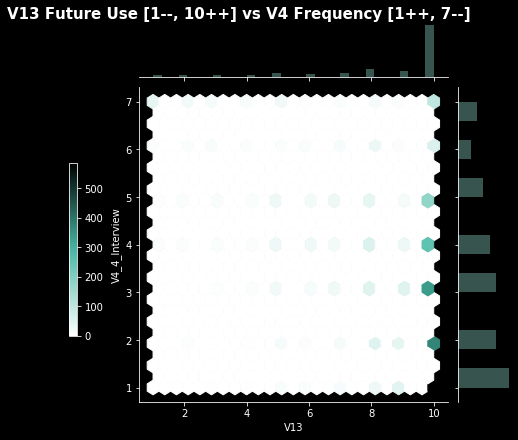

In [20]:
pd.value_counts(Apps_clean['V13'])
hexplot = sns.jointplot(Apps_clean['V13'], Apps_clean['V4_4_Interview'],
                        kind='hex')
cbar_ax = hexplot.fig.add_axes([-0.05, .25, .02, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)
plt.title('V13 Future Use [1--, 10++] vs V4 Frequency [1++, 7--] ',
          x=20, y=1.8, fontsize=15, fontweight='bold')
plt.show()

COMMENT:

High 10s in V3






In [21]:
# create the model using statsmodels.api
model = stm.OLS(Apps_clean.loc[:, 'V4_1_Interview'],
                stm.add_constant(Apps_clean.loc[:, 'V13'].values.reshape(-1, 1))).fit()
print(model.summary())

OLS Regression Results                            
Dep. Variable:         V4_1_Interview   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     1123.
Date:                Mon, 21 Oct 2019   Prob (F-statistic):          3.46e-209
Time:                        12:26:32   Log-Likelihood:                -5363.1
No. Observations:                2977   AIC:                         1.073e+04
Df Residuals:                    2975   BIC:                         1.074e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3954      0.103     61.881      0.000       6.193       6.598
x

**COMMENT**: <br />
 - Statistic evidence of different means <br />
 - High future use tend to use the app more

### Linear Regression between V4 and V14 (Recommendation \[1--,10++\])

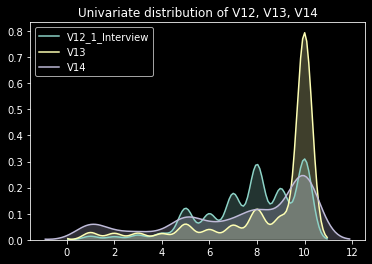

In [22]:
sns.kdeplot(Apps_clean['V12_1_Interview'], shade=True)
sns.kdeplot(Apps_clean['V13'], shade=True)
sns.kdeplot(Apps_clean['V14'], shade=True)
plt.title('Univariate distribution of V12, V13, V14')
plt.show()

**COMMENT**: <br />
 Univariate distribution shows higher values for V12, V13, V14
 with a weaker effect for V14

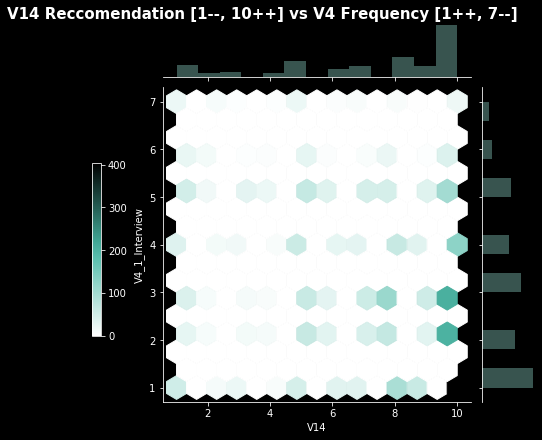

In [23]:
# So I expect the same behaviour of V12, V13, V14
# Joint probability distribution
hexplot = sns.jointplot(Apps_clean['V14'], Apps_clean['V4_1_Interview'],
                        kind='hex')
cbar_ax = hexplot.fig.add_axes([-0.05, .25, .02, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)
plt.title('V14 Reccomendation [1--, 10++] vs V4 Frequency [1++, 7--] ',
          x=20, y=1.8, fontsize=15, fontweight='bold')
plt.show()

**COMMENT:**<br />
 - Higher values indicate more frequently used apps.

In [24]:
# create the model using statsmodels.api
model = stm.OLS(Apps_clean.loc[:, 'V4_1_Interview'],
                stm.add_constant(Apps_clean.loc[:, 'V14'])).fit()
print(model.summary())

OLS Regression Results                            
Dep. Variable:         V4_1_Interview   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     196.4
Date:                Mon, 21 Oct 2019   Prob (F-statistic):           2.87e-43
Time:                        12:26:36   Log-Likelihood:                -5744.7
No. Observations:                2977   AIC:                         1.149e+04
Df Residuals:                    2975   BIC:                         1.151e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1013      0.081     50.682      0.000       3.943       4.260
V

**COMMENT:** <br />
 - There is statistic evidence in different means
 - Higher recommendation brings higher use frequency

### CORRELATION MAP

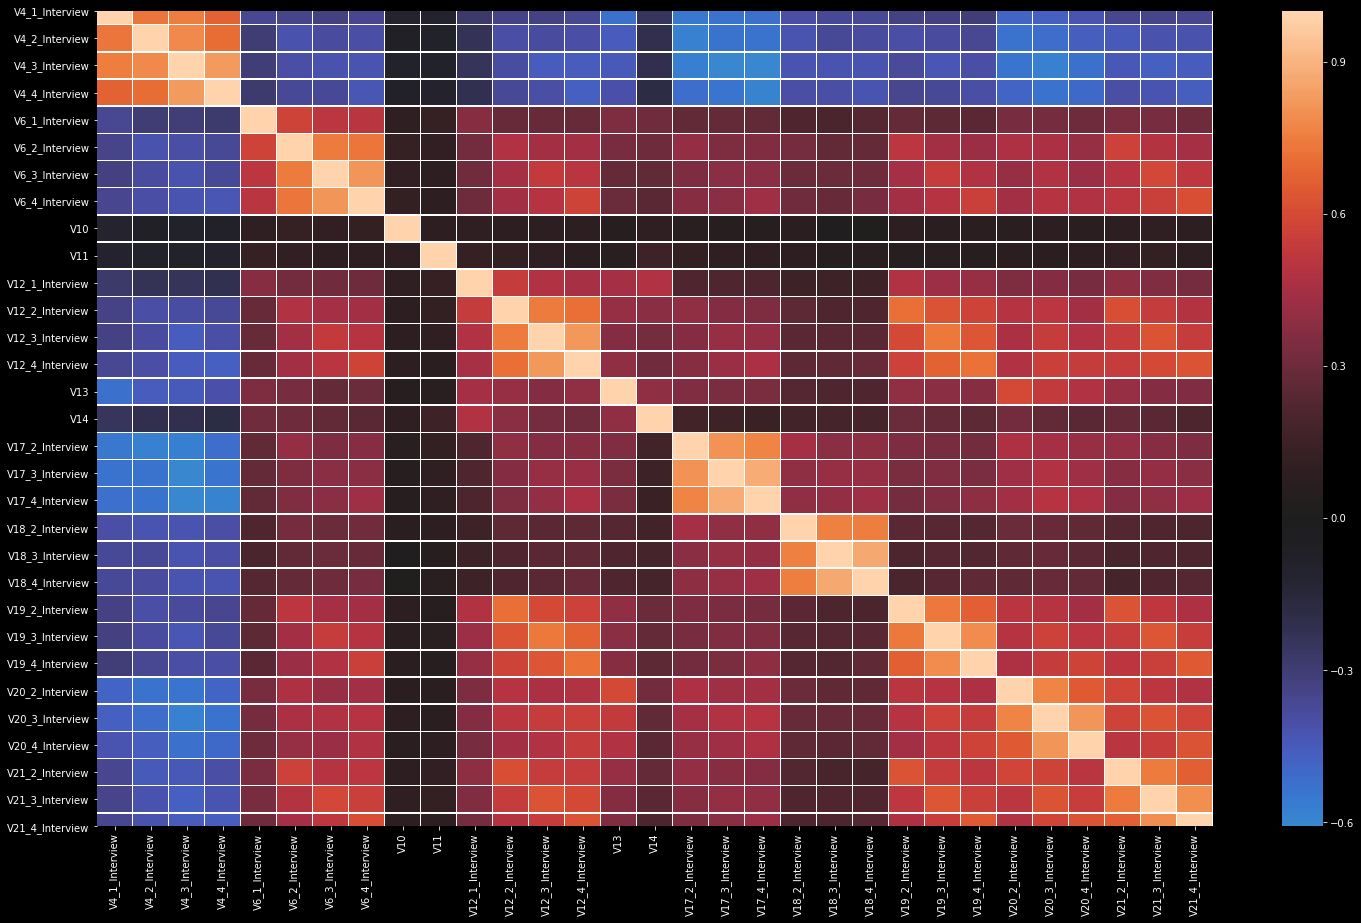

In [25]:
# index, identifiers and categorical variables
X = Apps_clean.drop(['Probanden_ID__lfdn__AppNr',
                     'Probanden_ID__lfdn',
                     'Datum_1_Interview', 'Datum_2_Interview',
                     'Datum_3_Interview',
                     'Datum_4_Interview', 'V1', 'V01', 'V2', 'V3',
                     'Miss_row_%', 'Days_Between_2_and_1_Interview',
                     'Days_Between_3_and_2_Interview',
                     'Days_Between_4_and_3_Interview', 'D4_2_1',
                     'D4_3_2', 'D4_4_3', 'D4_4_1', 'D6_2_1',
                     'D6_3_2', 'D6_4_3', 'D6_4_1', 'D12_2_1',
                     'D12_3_2', 'D12_4_3', 'D12_4_1'], axis=1)
corr = X.corr()

fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(corr, center=0, linewidths=0.5)
plt.show()

**COMMENT**:<br />
 V17, V18, V19, V20, V21 show positive correlation between the
 dependent variables and negative correlation with V4.
 V18 weaker than other.